# <a href="https://colab.research.google.com/github/nasim-aust/Brain-Tumor-Segmentation-using-CNN/blob/master/brain_tumor_segmentation_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2 as cv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.layers import Dropout
import cv2

In [2]:
classifier=Sequential()
classifier.add(Convolution2D(108,2,input_shape=(366,310,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3,3)))
classifier.add(Convolution2D(64,2,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3,3)))
classifier.add(Convolution2D(32,2,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3,3)))
classifier.add(Flatten())
classifier.add(Dense(200, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(2, activation='relu'))            

In [3]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 365, 309, 108)     1404      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 103, 108)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 102, 64)      27712     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 33, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4576)              0

In [4]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(
         'brain_tumor_dataset1/train',
          target_size=(310,366),
          batch_size=10,
          class_mode='binary')

test_set=test_datagen.flow_from_directory(
         'brain_tumor_dataset1/val',
          target_size=(310,366),
          batch_size=10,
          class_mode='binary')

Found 253 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [6]:
from PIL import Image
history = classifier.fit(
    training_set,
    
    epochs=30,
    validation_data=test_set
    )


Epoch 1/30
26/26 [==============================] - 47s 2s/step - loss: 4.1715 - accuracy: 0.6047 - val_loss: 0.6279 - val_accuracy: 0.6104
Epoch 2/30
26/26 [==============================] - 44s 2s/step - loss: 0.8392 - accuracy: 0.4071 - val_loss: 0.8231 - val_accuracy: 0.3766
Epoch 3/30
26/26 [==============================] - 45s 2s/step - loss: 0.8945 - accuracy: 0.4783 - val_loss: 1.1517 - val_accuracy: 0.6753
Epoch 4/30
26/26 [==============================] - 44s 2s/step - loss: 1.0121 - accuracy: 0.5731 - val_loss: 0.5607 - val_accuracy: 0.4805
Epoch 5/30
26/26 [==============================] - 45s 2s/step - loss: 0.7356 - accuracy: 0.4822 - val_loss: 0.5375 - val_accuracy: 0.3766
Epoch 6/30
26/26 [==============================] - 44s 2s/step - loss: 0.7579 - accuracy: 0.4427 - val_loss: 0.5072 - val_accuracy: 0.6234
Epoch 7/30
26/26 [==============================] - 44s 2s/step - loss: 0.8061 - accuracy: 0.5731 - val_loss: 0.5265 - val_accuracy: 0.6234
Epoch 8/30
26/26 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


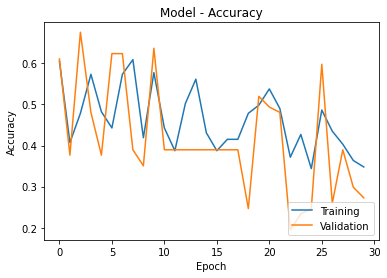

In [7]:
import matplotlib.pyplot as plt

# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


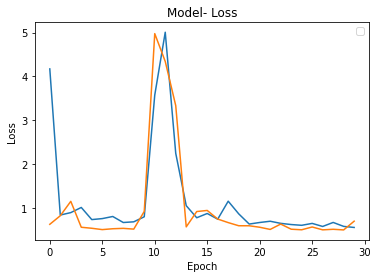

In [8]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [27]:
x1=os.listdir('brain_tumor_dataset1/train/yes')
x2=os.listdir('brain_tumor_dataset1/train/no')
train_x_data=np.concatenate([x1,x2])
len(train_x_data)

253

In [28]:
target_x1 = np.full(len(x1),0)
target_x2 = np.full(len(x2),1)
train_y_data = np.concatenate([target_x1,target_x2])
len(train_y_data)

253

In [29]:
len(train_y_data)==len(train_x_data)

True

In [30]:
tx1=os.listdir('brain_tumor_dataset1/train/yes')
tx2=os.listdir('brain_tumor_dataset1/train/no')
test_x_data=np.concatenate([tx1,tx2])
len(test_x_data)

253

In [31]:
target_tx1 = np.full(len(tx1),0)
target_tx2 = np.full(len(tx2),1)
test_y_data = np.concatenate([target_tx1,target_tx2])
len(test_y_data)

253

In [32]:
train_y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
x1_values=os.listdir('brain_tumor_dataset1/train/yes')
x2_values=os.listdir('brain_tumor_dataset1/train/no')
x1_values

['Y1.jpg',
 'Y10.jpg',
 'Y100.JPG',
 'Y101.jpg',
 'Y102.jpg',
 'Y103.jpg',
 'Y104.jpg',
 'Y105.jpg',
 'Y106.jpg',
 'Y107.jpg',
 'Y108.jpg',
 'Y109.JPG',
 'Y11.jpg',
 'Y111.JPG',
 'Y112.JPG',
 'Y113.JPG',
 'Y114.JPG',
 'Y115.JPG',
 'Y116.JPG',
 'Y117.JPG',
 'Y12.jpg',
 'Y120.JPG',
 'Y13.jpg',
 'Y14.jpg',
 'Y146.JPG',
 'Y147.JPG',
 'Y148.JPG',
 'Y15.jpg',
 'Y153.jpg',
 'Y154.jpg',
 'Y155.JPG',
 'Y156.JPG',
 'Y157.JPG',
 'Y158.JPG',
 'Y159.JPG',
 'Y16.JPG',
 'Y160.JPG',
 'Y161.JPG',
 'Y162.jpg',
 'Y163.JPG',
 'Y164.JPG',
 'Y165.JPG',
 'Y166.JPG',
 'Y167.JPG',
 'Y168.jpg',
 'Y169.jpg',
 'Y17.jpg',
 'Y170.JPG',
 'Y18.JPG',
 'Y180.jpg',
 'Y181.jpg',
 'Y182.JPG',
 'Y183.jpg',
 'Y184.JPG',
 'Y185.jpg',
 'Y186.jpg',
 'Y187.jpg',
 'Y188.jpg',
 'Y19.JPG',
 'Y192.JPG',
 'Y193.JPG',
 'Y194.jpg',
 'Y195.JPG',
 'Y2.jpg',
 'Y20.jpg',
 'Y21.jpg',
 'Y22.jpg',
 'Y23.JPG',
 'Y24.jpg',
 'Y242.JPG',
 'Y243.JPG',
 'Y244.JPG',
 'Y245.jpg',
 'Y246.JPG',
 'Y247.JPG',
 'Y248.JPG',
 'Y249.JPG',
 'Y25.jpg',
 'Y250

In [34]:
X_data =[]
for file in x1_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv.imread('brain_tumor_dataset1/train/yes/'+file)
    face = cv.resize(img, (256, 256) )
    (b, g, r)=cv.split(face) 
    img=cv.merge([r,g,b])
    X_data.append(img)
for file1 in x2_values:
    img = cv.imread('brain_tumor_dataset1/train/no/'+file1)
    face = cv.resize(img, (256, 256) )
    (b, g, r)=cv.split(face) 
    img=cv.merge([r,g,b])
    X_data.append(img)

In [35]:
X1 = np.squeeze(X_data)
X1.shape

(253, 256, 256, 3)

In [36]:
tx1_values=os.listdir('brain_tumor_dataset1/val/yes')
tx2_values=os.listdir('brain_tumor_dataset1/val/no')


In [37]:
tX_data =[]
for file in tx1_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv.imread('brain_tumor_dataset1/val/yes/'+file)
    face = cv.resize(img, (256, 256) )
    (b, g, r)=cv.split(face) 
    img=cv.merge([r,g,b])
    tX_data.append(img)
for file1 in tx2_values:
    img = cv.imread('brain_tumor_dataset1/val/no/'+file1)
    face = cv.resize(img, (256, 256) )
    (b, g, r)=cv.split(face) 
    img=cv.merge([r,g,b])
    tX_data.append(img)

In [38]:
tX1 = np.squeeze(tX_data)
tX1.shape

(77, 256, 256, 3)

In [39]:
#training
X = np.squeeze(X1)
print(X.shape)
#testing
#X1 = np.squeeze(X_test_data)
#print(X1.shape)

(253, 256, 256, 3)


In [40]:
X = X.astype('float32')
X /= 255
X1 = X1.astype('float32')
X1 /= 255

In [41]:
(x_train, y_train), (x_test, y_test) = (X, train_y_data) , (X1 , test_y_data )
#(x_valid , y_valid) = (x_test[:63], y_test[:63])
(x_valid , y_valid) = (x_test, y_test)

In [42]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=x_train.shape[1:]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28800)            

In [43]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [44]:
history = cnn.fit(x_train, y_train, epochs = 25, validation_data=(x_valid,y_valid))

Epoch 1/25
8/8 [==============================] - 75s 9s/step - loss: 0.7308 - accuracy: 0.5968 - val_loss: 0.5246 - val_accuracy: 0.7668
Epoch 2/25
8/8 [==============================] - 68s 9s/step - loss: 0.5106 - accuracy: 0.7866 - val_loss: 0.4542 - val_accuracy: 0.8024
Epoch 3/25
8/8 [==============================] - 71s 9s/step - loss: 0.4408 - accuracy: 0.8024 - val_loss: 0.3806 - val_accuracy: 0.8221
Epoch 4/25
8/8 [==============================] - 71s 9s/step - loss: 0.3827 - accuracy: 0.8261 - val_loss: 0.3290 - val_accuracy: 0.8617
Epoch 5/25
8/8 [==============================] - 67s 9s/step - loss: 0.3667 - accuracy: 0.8419 - val_loss: 0.2606 - val_accuracy: 0.8933
Epoch 6/25
8/8 [==============================] - 68s 9s/step - loss: 0.2474 - accuracy: 0.9091 - val_loss: 0.1488 - val_accuracy: 0.9605
Epoch 7/25
8/8 [==============================] - 73s 9s/step - loss: 0.2332 - accuracy: 0.9130 - val_loss: 0.1554 - val_accuracy: 0.9763
Epoch 8/25
8/8 [==================

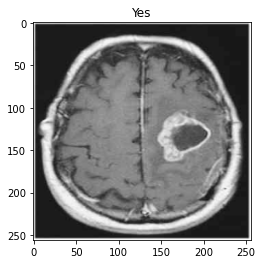

In [45]:
test_image=cv.imread("brain_tumor_dataset1/train/yes/Y10.jpg")
face = cv.resize(test_image, (256,256))
(b, g, r)=cv.split(face) 
img=cv.merge([r,g,b])
a = np.squeeze(img)
a = a[np.newaxis, :, :]
pred_y = cnn.predict(a)
if(pred_y[0][0]>pred_y[0][1]):
    plt.title("Yes")
    plt.imshow(img)
elif(pred_y[0][1]>pred_y[0][0]):
    plt.title("No")
    plt.imshow(img)


In [47]:
score = cnn.evaluate(x_valid, y_valid, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 1.0


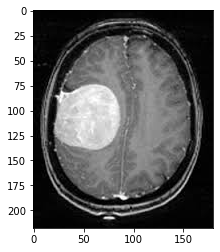

In [28]:
import cv2
image=cv2.imread('brain_tumor_dataset1/train/yes/Y1.jpg')
plt.imshow(image)
plt.show()

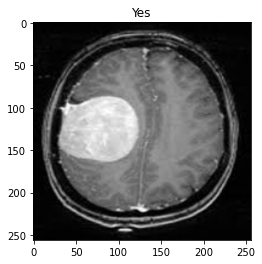

In [29]:
test_image=cv2.imread("Brain_tumor_dataset1/train/yes/Y1.jpg")
face = cv2.resize(test_image, (256,256))
(b, g, r)=cv.split(face) 
img=cv.merge([r,g,b])
a = np.squeeze(img)
a = a[np.newaxis, :, :]
pred_y = cnn.predict(a)
if(pred_y[0][0]>pred_y[0][1]):
    plt.title("Yes")
    plt.imshow(img)
elif(pred_y[0][1]>pred_y[0][0]):
    plt.title("No")
    plt.imshow(img)
else:
    plt.title("cannot be detected")
    plt.imshow(img)

In [30]:
pred_y[0][0]

1.0

In [31]:
pred_y[0][1]

0.0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


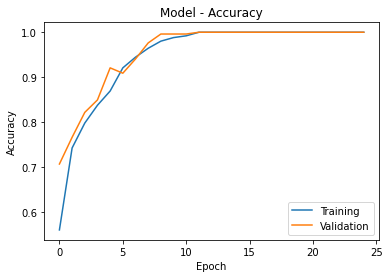

In [32]:
import matplotlib.pyplot as plt

# Accuracy
#print(history)
fig1, ax_acc = plt.subplots()
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


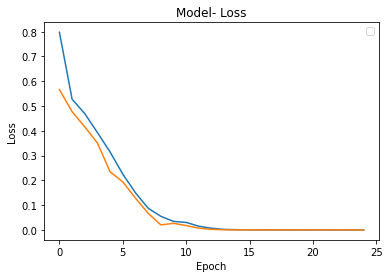

In [33]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

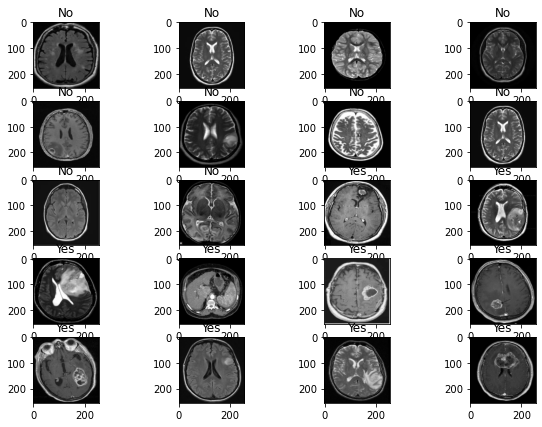

In [34]:
pred_1=os.listdir('Brain_tumor_dataset1/test')
pred_2 = []
count = 0
for file in pred_1:
    img = cv.imread('Brain_tumor_dataset1/test/'+file)
    face = cv.resize(img, (256, 256))
    (b, g, r)=cv.split(face) 
    img=cv.merge([r,g,b])
    a = np.squeeze(img)
    a = a[np.newaxis, :, :]
    pred_2.append(img)
    count = count+1
d = np.squeeze(pred_2)

row = 5
col = 4
pred_3 = cnn.predict(d)
fig = plt.figure(figsize=(10, 7))
for i in range (0,count):
    fig.add_subplot(row, col, i+1)
    if(pred_3[i][0]>pred_3[i][1]):
        plt.title("Yes")
    elif(pred_3[i][1]>pred_3[i][0]):
        plt.title("No")
    plt.imshow(d[i])

In [20]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, activation='relu', input_shape=x_train.shape[1:]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=3))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=3))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 253, 253, 128)     6272      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 84, 84, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 81, 81, 64)        131136    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 32)        32800     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [21]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = cnn.fit(x_train, y_train, epochs = 25, validation_data=(x_valid,y_valid))

Epoch 1/25


C:\Users\rithv\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


8/8 [==============================] - 64s 7s/step - loss: 0.7659 - accuracy: 0.6364 - val_loss: 0.5683 - val_accuracy: 0.7312
Epoch 2/25
8/8 [==============================] - 50s 6s/step - loss: 0.5427 - accuracy: 0.7589 - val_loss: 0.5022 - val_accuracy: 0.7708
Epoch 3/25
8/8 [==============================] - 51s 7s/step - loss: 0.5332 - accuracy: 0.7470 - val_loss: 0.4951 - val_accuracy: 0.8024
Epoch 4/25
8/8 [==============================] - 49s 6s/step - loss: 0.5082 - accuracy: 0.7984 - val_loss: 0.4471 - val_accuracy: 0.8103
Epoch 5/25
8/8 [==============================] - 49s 6s/step - loss: 0.4625 - accuracy: 0.8063 - val_loss: 0.4321 - val_accuracy: 0.8261
Epoch 6/25
8/8 [==============================] - 49s 6s/step - loss: 0.4258 - accuracy: 0.8142 - val_loss: 0.3853 - val_accuracy: 0.8182
Epoch 7/25
8/8 [==============================] - 49s 6s/step - loss: 0.3909 - accuracy: 0.8261 - val_loss: 0.3218 - val_accuracy: 0.8300
Epoch 8/25
8/8 [=============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


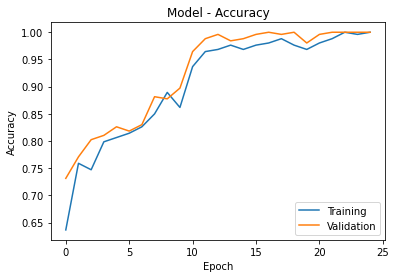

In [23]:
import matplotlib.pyplot as plt

# Accuracy
#print(history)
fig1, ax_acc = plt.subplots()
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

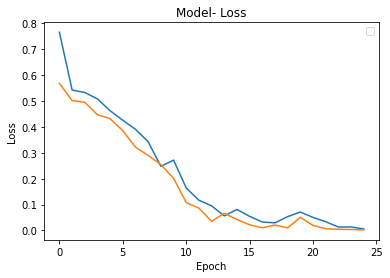

In [24]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

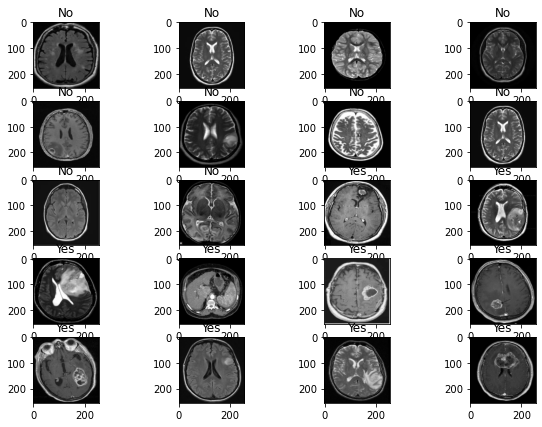

In [25]:
pred_1=os.listdir('Brain_tumor_dataset1/test')
pred_2 = []
count = 0
for file in pred_1:
    img = cv.imread('Brain_tumor_dataset1/test/'+file)
    face = cv.resize(img, (256, 256))
    (b, g, r)=cv.split(face) 
    img=cv.merge([r,g,b])
    a = np.squeeze(img)
    a = a[np.newaxis, :, :]
    pred_2.append(img)
    count = count+1
d = np.squeeze(pred_2)

row = 5
col = 4
pred_3 = cnn.predict(d)
fig = plt.figure(figsize=(10, 7))
for i in range (0,count):
    fig.add_subplot(row, col, i+1)
    if(pred_3[i][0]>pred_3[i][1]):
        plt.title("Yes")
    elif(pred_3[i][1]>pred_3[i][0]):
        plt.title("No")
    plt.imshow(d[i])

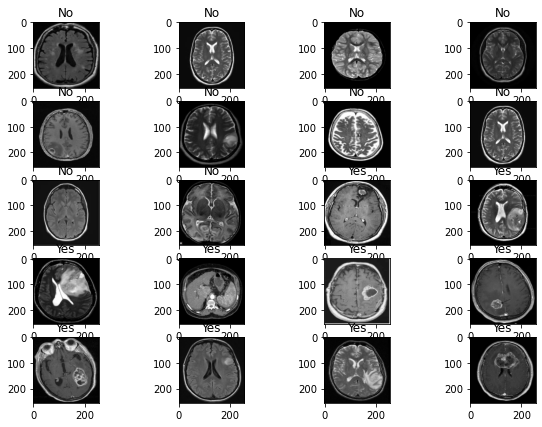

In [41]:
pred_1=os.listdir('Brain_tumor_dataset1/test')
pred_2 = []
count = 0
for file in pred_1:
    img = cv.imread('Brain_tumor_dataset1/test/'+file)
    face = cv.resize(img, (256, 256))
    (b, g, r)=cv.split(face) 
    img=cv.merge([r,g,b])
    a = np.squeeze(img)
    a = a[np.newaxis, :, :]
    pred_2.append(img)
    count = count+1
d = np.squeeze(pred_2)

row = 5
col = 4
pred_3 = cnn.predict(d)
fig = plt.figure(figsize=(10, 7))
for i in range (0,count):
    fig.add_subplot(row, col, i+1)
    if(pred_3[i][0]>pred_3[i][1]):
        plt.title("Yes")
    elif(pred_3[i][1]>pred_3[i][0]):
        plt.title("No")
    plt.imshow(d[i])

In [42]:
classifier=Sequential()
classifier.add(Convolution2D(108,2,input_shape=(366,310,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3,3)))
classifier.add(Convolution2D(64,2,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3,3)))
classifier.add(Convolution2D(32,2,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3,3)))
classifier.add(Flatten())
classifier.add(Dense(200, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(2, activation='relu'))  
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 365, 309, 108)     1404      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 121, 103, 108)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 120, 102, 64)      27712     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 40, 34, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 39, 33, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 11, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4576)             

In [43]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
history = cnn.fit(x_train, y_train, epochs = 25, validation_data=(x_valid,y_valid))

Epoch 1/25
8/8 [==============================] - 61s 8s/step - loss: 0.0140 - accuracy: 0.9921 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/25
8/8 [==============================] - 57s 7s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9960
Epoch 3/25
8/8 [==============================] - 57s 7s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 0.9960
Epoch 4/25
8/8 [==============================] - 56s 7s/step - loss: 0.0806 - accuracy: 0.9684 - val_loss: 0.0572 - val_accuracy: 0.9763
Epoch 5/25
8/8 [==============================] - 57s 7s/step - loss: 0.0393 - accuracy: 0.9842 - val_loss: 4.8394e-04 - val_accuracy: 1.0000
Epoch 6/25
8/8 [==============================] - 58s 7s/step - loss: 0.0079 - accuracy: 0.9960 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/25
8/8 [==============================] - 57s 7s/step - loss: 0.0070 - accuracy: 0.9960 - val_loss: 3.0584e-04 - val_accuracy: 1.0000
Epoch 8/25
8/8 [==========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


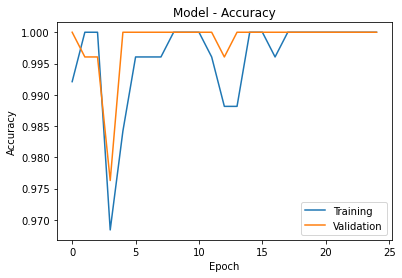

In [45]:
import matplotlib.pyplot as plt

# Accuracy
#print(history)
fig1, ax_acc = plt.subplots()
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

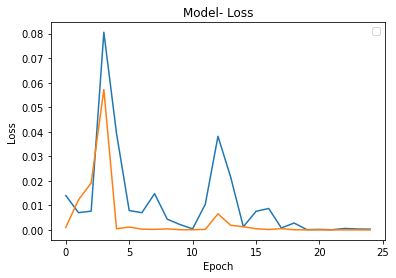

In [46]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

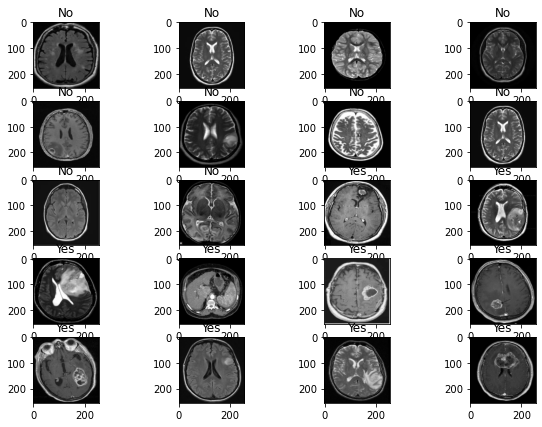

In [47]:
pred_1=os.listdir('Brain_tumor_dataset1/test')
pred_2 = []
count = 0
for file in pred_1:
    img = cv.imread('Brain_tumor_dataset1/test/'+file)
    face = cv.resize(img, (256, 256))
    (b, g, r)=cv.split(face) 
    img=cv.merge([r,g,b])
    a = np.squeeze(img)
    a = a[np.newaxis, :, :]
    pred_2.append(img)
    count = count+1
d = np.squeeze(pred_2)

row = 5
col = 4
pred_3 = cnn.predict(d)
fig = plt.figure(figsize=(10, 7))
for i in range (0,count):
    fig.add_subplot(row, col, i+1)
    if(pred_3[i][0]>pred_3[i][1]):
        plt.title("Yes")
    elif(pred_3[i][1]>pred_3[i][0]):
        plt.title("No")
    plt.imshow(d[i])